In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("files/water_potability.csv")

df.fillna(df.median(), inplace=True)

X = df.drop(columns=['Potability'])
y = df['Potability']


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


In [6]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [7]:
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(f"SVM Accuracy: {svm_acc}")


Logistic Regression Accuracy: 0.6286876907426246
SVM Accuracy: 0.6968463886063072


In [8]:
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
svm_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])


In [9]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])


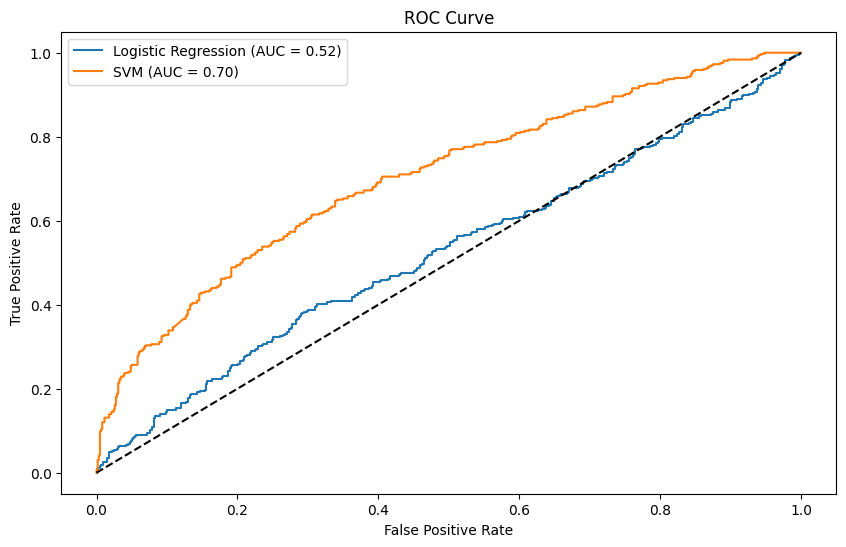

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(log_reg_fpr, log_reg_tpr, label=f"Logistic Regression (AUC = {log_reg_roc_auc:.2f})")
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Dashed line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
